# Лабораторная работа №2 по Машинному Обучению
**Краткая информация о выбранных данных**

В качестве датасета для лабораторной работы был выбран другой набор данных, так как в предыдущем наборе данные были созданы искусственно, соответственно не было выбросов и т.д., что существенно ограничивает выполнение лабораторной работы

**Атрибуты:**

1. Alcohol (Спиртовое вещество) - Процентное содержание алкоголя в
вине. Этот параметр измеряет количественное содержание этанола в
вине и влияет на его крепость. - float64

2. Malic Acid (Яблочная кислота) - Количество яблочной кислоты в вине.
Яблочная кислота придает вину свежесть и яркость. - float64

3. Ash (Зольность) - Количество минеральных веществ (золы) в вине после
испарения воды и сжигания остатков. Он отражает минеральность вина. - float64

4. Alcalinity of Ash (Щелочность золы) - Щелочность золы в вине.
Щелочность измеряет pH-уровень вина и влияет на его вкусовые
характеристики. - float64

5. Magnesium (Магний) - Количество магния в вине. Магний является
одним из микроэлементов, которые могут влиять на вкус и аромат вина. - int64

6. Total Phenols (Общее количество фенолов) - Общее количество
фенольных соединений в вине. Фенолы являются антиоксидантами и
могут влиять на вкус и цвет вина. - float64

7. Flavanoids (Флавоноиды) - Количество флавоноидов в вине.
Флавоноиды также являются фенольными соединениями и могут
вносить вклад в вкус и цвет вина, а также обладают антиоксидантными
свойствами. - float64

8. Nonflavanoid Phenols (НЕ флавоноидные фенолы) - Количество не
флавоноидных фенольных соединений в вине. - float64

9. Proanthocyanins (Проантоцианидины) - Количество
проантоцианидинов в вине. Проантоцианидины также относятся к
группе фенольных соединений. - float64

10. Color Intensity (Интенсивность цвета) - Интенсивность цвета вина,
измеряется как абсорбция света при определенной длине волны. Этот
параметр связан с глубиной цвета вина. - float64

11. Hue (Оттенок) - Оттенок вина, измеряется на цветовой шкале. Это
значение может варьироваться от оранжевого до фиолетового и связано
с цветовой тонкостью вина. - float64

12. OD280/OD315 of Diluted Wines (Оптическая плотность при
разбавленных винах) - Оптическая плотность вина при определенной
длине волны. Этот параметр может быть связан с содержанием вина
антоцианов (пигменты, придающие вину красный цвет). - float64

13. Proline (Пролин) - Количество аминокислоты пролина в вине. Пролин
может влиять на текстуру и структуру вина. - int64


Сначала просмотрим на то, с какими данными нам придется работать и выведем их в таблицу. Убедимся, что все атрибуты на месте.

In [9]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("wine.csv")
file.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Проверим общую информацию о датасете.

In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Добавим новый атрибут.

Flavanoids_Higher_Than_Nonflavanoid - атрибут, который будет показывать на то, в каком вине содержание флавоноидов больше, чем содержание НЕ флавоноидных фенолов. Если значение флавоноидов больше, то в таблице будет указано значение True, в противном случае False.

In [21]:
file = pd.read_csv("wine.csv")

df = pd.DataFrame(data)

df['Flavanoids_Higher_Than_Nonflavanoid'] = df['Flavanoids'] > df['Nonflavanoid_Phenols']

row2 = df.iloc[135:140] #вывожу строчки из середины таблицы, так как в самом начале не видно разных значений в последнем столбце
row2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Flavanoids_Higher_Than_Nonflavanoid
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,True
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,False
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,False
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,False
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590,True


Определим количество выбросов для каждого атрибута, используя Z-оценку.

In [16]:
from scipy import stats

attributes = [file['Alcohol'],
                file['Malic_Acid'],
                file['Ash'],
                file['Ash_Alcanity'],
                file['Magnesium'],
                file['Total_Phenols'],
                file['Flavanoids'],
                file['Nonflavanoid_Phenols'],
                file['Proanthocyanins'],
                file['Color_Intensity'],
                file['Hue'], 
                file['OD280'], 
                file['Proline']]

for attr in attributes:
    clean_attr = attr[np.abs(stats.zscore(attr)) < 2.5]
    print(f"Количество строк с выбросами ({attr.name}): {len(attr)}")
    print(f"Количество строк без выбросов ({attr.name}): {len(clean_attr)}")
    print("\n")

Количество строк с выбросами (Alcohol): 178
Количество строк без выбросов (Alcohol): 178


Количество строк с выбросами (Malic_Acid): 178
Количество строк без выбросов (Malic_Acid): 174


Количество строк с выбросами (Ash): 178
Количество строк без выбросов (Ash): 175


Количество строк с выбросами (Ash_Alcanity): 178
Количество строк без выбросов (Ash_Alcanity): 174


Количество строк с выбросами (Magnesium): 178
Количество строк без выбросов (Magnesium): 174


Количество строк с выбросами (Total_Phenols): 178
Количество строк без выбросов (Total_Phenols): 177


Количество строк с выбросами (Flavanoids): 178
Количество строк без выбросов (Flavanoids): 177


Количество строк с выбросами (Nonflavanoid_Phenols): 178
Количество строк без выбросов (Nonflavanoid_Phenols): 178


Количество строк с выбросами (Proanthocyanins): 178
Количество строк без выбросов (Proanthocyanins): 176


Количество строк с выбросами (Color_Intensity): 178
Количество строк без выбросов (Color_Intensity): 176


Ко

Удалим дубликаты из датасета.

In [19]:
file = pd.read_csv("wine.csv")

file = file.drop_duplicates()
print("Количество строк после удаления дубликатов:", len(file))

print(file.isnull().sum())

Количество строк после удаления дубликатов: 178
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


Удалим выбросы из датасета, используя IQR.

In [6]:
for col in file.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = file[col].quantile(0.25)
    Q3 = file[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    file = file[(file[col] >= lower_bound) & (file[col] <= upper_bound)]

print("Количество строк после удаления выбросов:", len(file))

Количество строк после удаления выбросов: 161


Удалим аномальные данные, используя Z-оценку.

In [8]:
from scipy import stats

z_scores = stats.zscore(file.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)
file = file[filtered_entries]

print("Количество строк после удаления аномальных данных:", len(file))

Количество строк после удаления аномальных данных: 143


Сохраняем и выводим очищенный датасет.

In [23]:
file.to_csv("wine_cleaned.csv", index=False)

display(file.head())

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Построим графики зависимости одной переменной от другой.

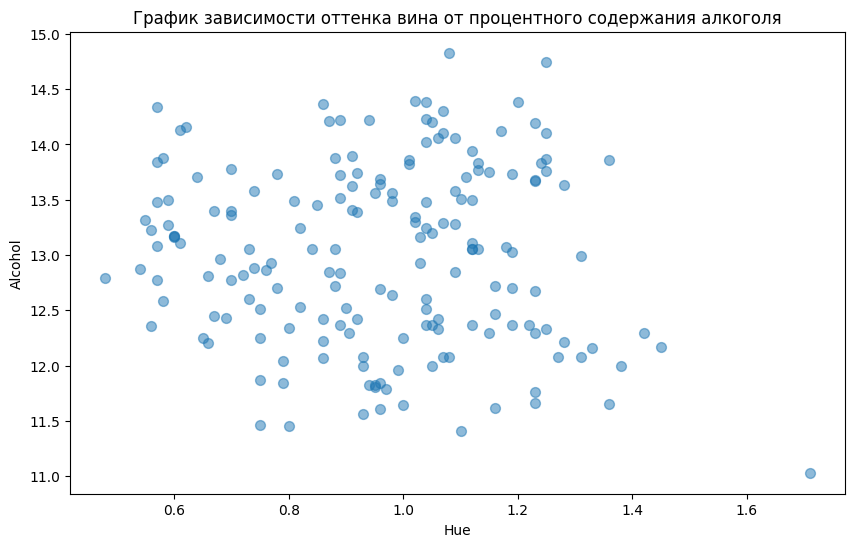

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(file["Hue"], file["Alcohol"], s=50, alpha=0.5) 
plt.xlabel("Hue")
plt.ylabel("Alcohol")
plt.title("График зависимости оттенка вина от процентного содержания алкоголя")
plt.show()

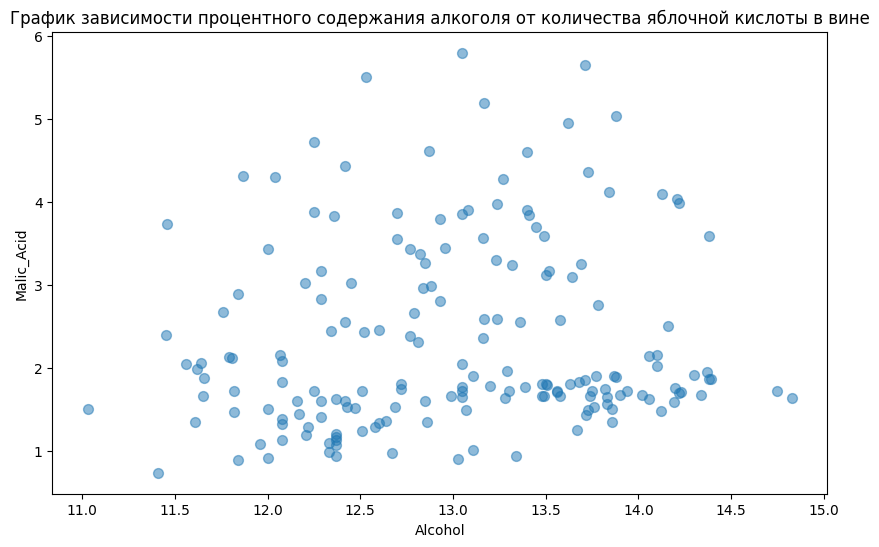

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(file["Alcohol"], file["Malic_Acid"], s=50, alpha=0.5) 
plt.xlabel("Alcohol")
plt.ylabel("Malic_Acid")
plt.title("График зависимости процентного содержания алкоголя от количества яблочной кислоты в вине")
plt.show()

Все точки на двух графиках расположены достаточно хаотично, что свидетельствует о том, что нет явной зависимости между величинами соответствующих графиков.

Применим метод KMeans к нашему датасету.

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

#Используем метод KMeans для 3ех кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

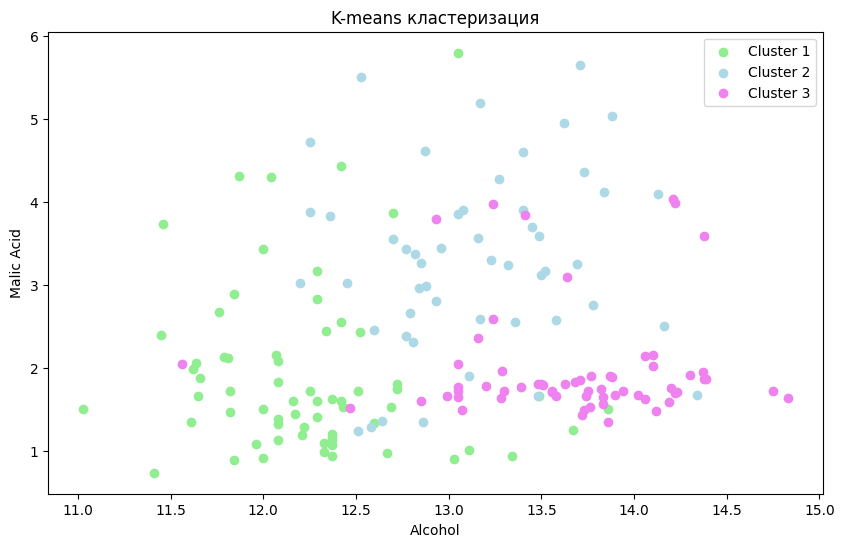

In [41]:
import matplotlib.pyplot as plt

# Добавляем кластеры
df['cluster'] = kmeans.labels_

# Визуализируем кластеры
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'][df['cluster'] == 0], df['Malic_Acid'][df['cluster'] == 0], c='lightgreen', label='Cluster 1')
plt.scatter(df['Alcohol'][df['cluster'] == 1], df['Malic_Acid'][df['cluster'] == 1], c='lightblue', label='Cluster 2')
plt.scatter(df['Alcohol'][df['cluster'] == 2], df['Malic_Acid'][df['cluster'] == 2], c='violet', label='Cluster 3')

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means кластеризация')

plt.legend()
plt.show()

**Вывод**

В ходе лабораторной работы был добавлен новый аттрибут в существующий датасет, затем этот датасет был обработан (выявлены выбросы, аномальные данные).

Был применен метод KMeans к нашему датасету, который разбил наш датасет на 3 кластера.